# PLAYMENT EXPERIMENTS

In [20]:
import skimage.io
image_urls = ['http://c7.alamy.com/comp/HTJNP0/da-lat-viet-nam-jan-1-crowded-scene-at-dalat-flower-park-at-flower-HTJNP0.jpg',
            'https://necessaryandpropergovt.files.wordpress.com/2012/07/crowded-street-scene1.jpg']

images = []
for image_url in image_urls:
    images.append(skimage.io.imread(image_url))

In [3]:
import skimage.io
img_url = 'https://s3.amazonaws.com/open_datasets/open_datasets/mapillary/mapillary-vistas-dataset_public_v1.0/training/images/-4Kw4AJqOzZG8q5le7bGlQ.jpg'
img = skimage.io.imread(img_url)

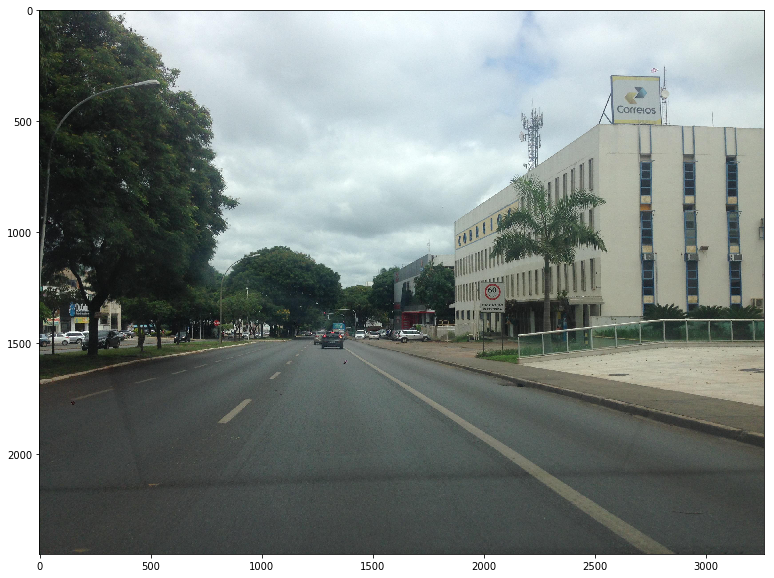

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))
plt.imshow(img)

In [6]:
res = [(b'car', 0.870866060256958, (1304.5904541015625, 1486.255126953125, 97.24223327636719, 75.12886047363281)), (b'car', 0.7048994898796082, (1603.6912841796875, 1465.477783203125, 63.21833801269531, 44.190731048583984)), (b'car', 0.6937544941902161, (1531.7984619140625, 1457.7156982421875, 54.0379638671875, 41.674591064453125)), (b'car', 0.6604713201522827, (1473.71484375, 1460.9827880859375, 46.81721878051758, 37.17317581176758)), (b'car', 0.6528489589691162, (1666.4080810546875, 1461.6656494140625, 88.50007629394531, 46.808815002441406)), (b'car', 0.5850618481636047, (1227.1961669921875, 1463.18896484375, 48.151710510253906, 32.47652053833008)), (b'car', 0.5468863248825073, (1343.5006103515625, 1450.7083740234375, 57.22135543823242, 44.42178726196289))]

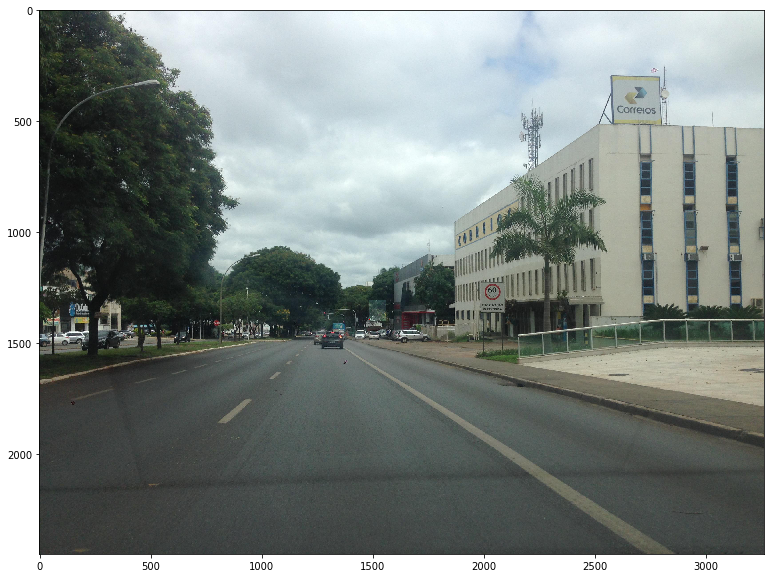

In [19]:
import numpy as np
f = np.array(img)
f[(1486):(1486+75), (1304):(1304+97)] *= 2
plt.figure(figsize=(15, 10))
plt.imshow(f)

In [252]:
import os
from scipy.signal import wiener
import numpy as np
from scipy.interpolate import UnivariateSpline
from scipy.signal import wiener, filtfilt, butter, gaussian, freqz, medfilt
from scipy.ndimage import filters
import scipy.optimize as op
import matplotlib.pyplot as plt

import sys
sys.path.append('../')
import utils

In [120]:
lm_file_3 = '/shared/fusor/home/voleti.vikram/ANDREW_NG/landmarks_in_frames_person/CV_03.C4W1L03_More_Edge_Detection_landmarks_in_frames_andrew_ng.txt'

In [121]:
def read_landmarks_list_from_txt(path):
    landmarks_list = []
    translate_table = dict((ord(char), None) for char in '[],')
    with open(path, "r") as f:
        for line in f:
            row = line.strip().split(" [")
            video_frame_name = row[0]
            landmarks = row[1:]
            landmarks_list.append([video_frame_name] + [[int(e.translate(translate_table)) for e in l.split(" ")] for l in landmarks])
    return landmarks_list

In [122]:
lms_list = read_landmarks_list_from_txt(lm_file_3)

In [174]:
lms_list[0], len(lms_list[0])

(['/shared/fusor/home/voleti.vikram/ANDREW_NG/frames/CV_03.C4W1L03_More_Edge_Detection/CV_03.C4W1L03_More_Edge_Detection_frame_00040.png'],
 1)

In [125]:
lms_list[10]

['CV_03.C4W1L03_More_Edge_Detection_frame_00050.png',
 [685, 222],
 [685, 237],
 [686, 252],
 [688, 267],
 [693, 280],
 [701, 293],
 [711, 303],
 [723, 311],
 [735, 314],
 [748, 313],
 [757, 306],
 [766, 296],
 [772, 285],
 [777, 273],
 [781, 261],
 [783, 248],
 [785, 235],
 [704, 208],
 [711, 201],
 [721, 198],
 [732, 200],
 [741, 205],
 [754, 209],
 [762, 207],
 [771, 208],
 [779, 212],
 [781, 220],
 [746, 221],
 [746, 231],
 [746, 240],
 [746, 250],
 [733, 259],
 [739, 260],
 [744, 262],
 [749, 261],
 [754, 260],
 [713, 219],
 [719, 216],
 [725, 217],
 [731, 222],
 [724, 222],
 [718, 222],
 [757, 226],
 [762, 222],
 [768, 223],
 [772, 227],
 [767, 228],
 [762, 227],
 [722, 279],
 [730, 275],
 [738, 272],
 [743, 274],
 [748, 273],
 [753, 276],
 [757, 281],
 [752, 287],
 [747, 290],
 [742, 290],
 [736, 290],
 [729, 286],
 [726, 279],
 [738, 277],
 [743, 278],
 [747, 278],
 [754, 281],
 [747, 283],
 [742, 284],
 [737, 283]]

In [176]:
len(lms_list[50])

69

## 1. Get lists of continuous frames' idx

In [179]:
prev_frame_num = -1
cont_frame_nums_idx = []
cont_frame_nums_idx.append([])
cont_frame_nums = []
cont_frame_nums.append([])
for l, lm in enumerate(lms_list):
    if len(lm) != 1:
        frame_num = int(os.path.splitext(lm[0].split('/')[-1])[0].split('_')[-1])
        if frame_num - prev_frame_num > 1 and prev_frame_num != -1:
            cont_frame_nums_idx.append([])
            cont_frame_nums.append([])
        cont_frame_nums_idx[-1].append(l)
        cont_frame_nums[-1].append(frame_num)
        prev_frame_num = frame_num

In [180]:
cont_frame_nums[0]

[47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 186,
 187,
 188,
 189,
 190,
 191,
 192,
 193,
 194,
 195,
 196,
 197,
 198,
 199,
 200,
 201,
 202,
 203,
 204,
 205,
 206,
 207,
 208,
 209,
 210,
 211,
 212,
 213,
 214,
 215,
 216,
 217,
 218,
 219,
 220,
 221,
 22

## 2. Get the list of continuous landmarks

In [181]:
cont_landmarks = []
for one_cont_frame_nums_idx in cont_frame_nums_idx:
    cont_landmarks.append([])
    for idx in one_cont_frame_nums_idx:
        if lms_list[idx][1:] != []:
            cont_landmarks[-1].append(lms_list[idx][1:])

In [182]:
np.array(cont_landmarks[0]).shape

(811, 68, 2)

In [183]:
np.array(cont_landmarks[1]).shape

(1154, 68, 2)

### Plot a landmark

In [243]:
f0 = cont_frame_nums[0]
lm0 = np.array(cont_landmarks[0])[:, 48, 0]

In [244]:
s00, e00 = 0, 20
f00, lm00 = f0[s00:e00+1], lm0[s00:e00+1]

In [245]:
# frames 300 to 360
s01, e01 = cont_frame_nums[0].index(300), cont_frame_nums[0].index(360)
f01, lm01 = f0[s01:e01+1], lm0[s01:e01+1]

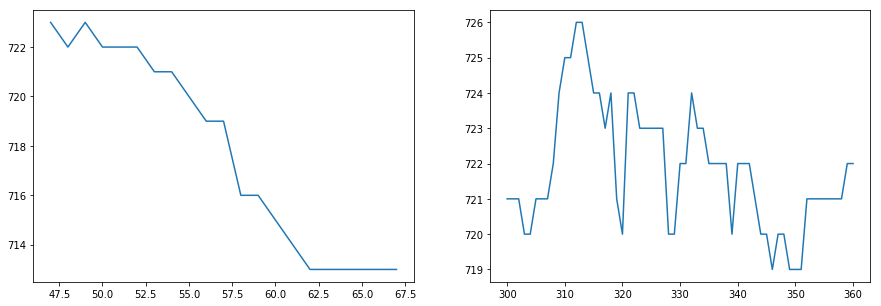

In [246]:
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.plot(f00, lm00)
plt.subplot(122)
plt.plot(f01, lm01)

## 3. Applying median filter

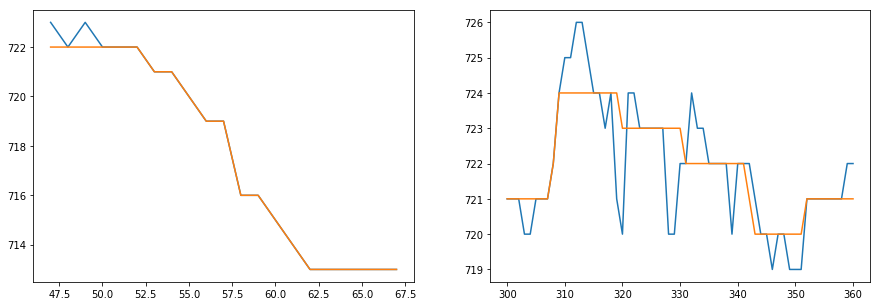

In [250]:
medfilt_lm0 = medfilt(lm0, kernel_size=11)
medfilt_lm00 = medfilt_lm0[s00:e00+1]
medfilt_lm01 = medfilt_lm0[s01:e01+1]

plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.plot(f00, lm00)
plt.plot(f00, medfilt_lm00)
plt.subplot(122)
plt.plot(f01, lm01)
plt.plot(f01, medfilt_lm01)

## 4. Applying weiner filter

In [ ]:

def testGauss(x, y, s, npts):
    b = gaussian(39, 10)
    #ga = filtfilt(b/b.sum(), [1.0], y)
    ga = filters.convolve1d(y, b/b.sum())
    plt.plot(x, ga)
    print "gaerr", ssqe(ga, s, npts)
    return ga
 
def testButterworth(nyf, x, y, s, npts):
    b, a = butter(4, 1.5/nyf)
    fl = filtfilt(b, a, y)
    plt.plot(x,fl)
    print "flerr", ssqe(fl, s, npts)
    return fl
 
def testWiener(x, y, s, npts):
    wi = wiener(y, mysize=29, noise=0.5)
    plt.plot(x,wi)
    print "wieerr", ssqe(wi, s, npts)
    return wi
 
def testSpline(x, y, s, npts):
    sp = UnivariateSpline(x, y, s=240)
    plt.plot(x,sp(x))
    print "splerr", ssqe(sp(x), s, npts)
    return sp(x)


/users/voleti.vikram/.local/lib/python3.6/site-packages/scipy/signal/signaltools.py:928: RuntimeWarning: divide by zero encountered in true_divide
  res *= (1 - noise / lVar)
/users/voleti.vikram/.local/lib/python3.6/site-packages/scipy/signal/signaltools.py:928: RuntimeWarning: invalid value encountered in multiply
  res *= (1 - noise / lVar)


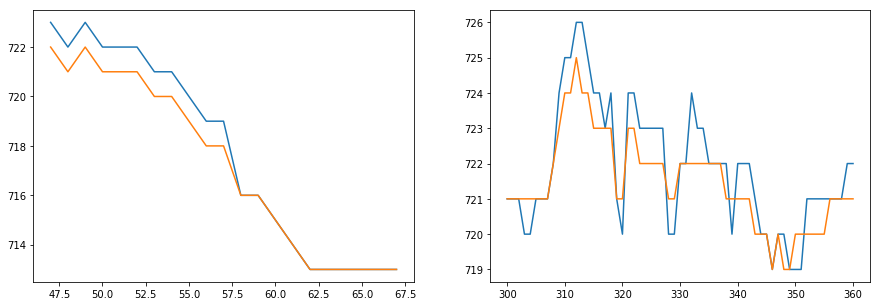

In [261]:
weiner_lm0 = wiener(lm0, mysize=11, noise=0.9).astype(int)
weiner_lm00 = weiner_lm0[s00:e00+1]
weiner_lm01 = weiner_lm0[s01:e01+1]

plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.plot(f00, lm00)
plt.plot(f00, weiner_lm00)
plt.subplot(122)
plt.plot(f01, lm01)
plt.plot(f01, weiner_lm01)

In [5]:
from make_andrew_ng_dataset_functions_using_nonCNN import *
import dlib
import imageio

ANDREW_NG_DIR = '/shared/fusor/home/voleti.vikram/ANDREW_NG/pilot'
ANDREW_NG_REF_IMAGE = '/shared/fusor/home/voleti.vikram/ANDREW_NG/andrew_ng.png'
shape_predictor_path = '/shared/fusor/home/voleti.vikram/shape_predictor_68_face_landmarks.dat'
cnn_face_detector_path = '/shared/fusor/home/voleti.vikram/mmod_human_face_detector.dat'
face_rec_model_path = '/shared/fusor/home/voleti.vikram/dlib_face_recognition_resnet_model_v1.dat'

video_file = '/shared/fusor/home/voleti.vikram/ANDREW_NG/pilot/old_dataset/videos/01_small.mp4'

In [15]:
import sys
sys.path.append('../')
import utils

# 1. USING DLIB DETECTOR, PREDICTOR

In [ ]:
extract_person_face_frames(video_file,
                           out_dir='/shared/fusor/home/voleti.vikram/ANDREW_NG/pilot/old_dataset/videos/a',
                           person_name='andrew_ng',
                           person_face_image=ANDREW_NG_REF_IMAGE,
                           shape_predictor_path=shape_predictor_path,
                           face_rec_model_path=face_rec_model_path,
                           overwrite_frames=True, overwrite_face_shapes=False, save_faces=False,
                           profile_time=True)

dlib shape predictor is not given. Loading from shape_predictor_path
dlib facerec model is not given. Loading from face_rec_model_path


# 2. USING CNN_FACE_DETECTOR

In [7]:
dlib_face_detector = dlib.cnn_face_detection_model_v1(cnn_face_detector_path)
dlib_face_detector = dlib.get_frontal_face_detector()
dlib_shape_predictor = dlib.shape_predictor(shape_predictor_path)
dlib_facerec = dlib.face_recognition_model_v1(face_rec_model_path)

In [ ]:
ref_frame = imageio.imread(ANDREW_NG_REF_IMAGE)
ref_face = dlib_face_detector(ref_frame, 1)[0]
ref_shape = dlib_shape_predictor(ref_frame, ref_face)
person_face_descriptor = np.array(dlib_facerec.compute_face_descriptor(ref_frame, ref_shape))

In [6]:
video_file_split = video_file.split('/')
videos_index = video_file_split.index('videos')
video_file_name = os.path.splitext('_'.join(video_file_split[videos_index+1:]))[0]
frames_dir = os.path.join('/shared/fusor/home/voleti.vikram/ANDREW_NG/', 'frames', video_file_name)
if not os.path.exists(frames_dir):
    print("Making dir", frames_dir)
    os.makedirs(frames_dir)

video_frames_reader = imageio.get_reader(video_file)
video_frames = []
for frame_number, frame in enumerate(tqdm(video_frames_reader, total=len(video_frames_reader))):
    video_frames.append(frame)
    video_frame_base_name = video_file_name + "_frame_{0:05d}.png".format(frame_number)
    video_frame_name = os.path.join(frames_dir, video_frame_base_name)
    imageio.imwrite(video_frame_name, frame)

In [ ]:
def convert_to_rect(cnn_output):
    return cnn_output.rect

In [ ]:
# Batch detect faces in frames
for i in range(0, len(frames), batch_size):
    batch_frames = frames[i:i+batch_size]
    s = time.time()
    batch_faces = dlib_face_detector(batch_frames, 1, batch_size=len(batch_frames))
    e = time.time()
    dur_avg = (e - s)/len(batch_frames)
    print(dur_avg)
    batch_face_rects = list(map(convert_to_rect, batch_faces))


In [4]:
image = '/shared/fusor/home/voleti.vikram/ANDREW_NG/frames/CV_02.C4W1L02_Edge_Detection_Examples/CV_02.C4W1L02 Edge Detection Examples_frame_00236.png'

In [6]:
import imageio
img = imageio.imread(image)

In [8]:
import matplotlib.pyplot as plt
plt.imshow(img)

In [ ]:
detector = dlib.get_frontal_face_detector()
faces = detector(img, 1)

In [2]:

def get_person_face_lm_from_face_shapes(frame, face_shapes, person_face_descriptor, dlib_facerec):
    '''Get the facial landmarks of a specific person
    http://dlib.net/face_recognition.py.html
    '''

    # Compute the face descriptors
    face_descriptors = []
    for shape in face_shapes:
        face_descriptors.append(np.array(dlib_facerec.compute_face_descriptor(frame, shape)))

    # Compare the face descriptors
    face_descriptors_distance = np.linalg.norm(person_face_descriptor - np.array(face_descriptors).reshape(len(face_descriptors), person_face_descriptor.shape[-1]), axis=-1)

    # Choose the face with least distance, if least distance is less than 0.6
    try:
        least_dist_face = np.argmin(face_descriptors_distance)
        # If the least distant face is > 0.6, it's someone else's face
        if least_dist_face > 0.6:
            return None
    except ValueError:
        # If there are no faces in the frame, return None
        return None

    # Return the landamrks of their face in frame
    return utils.shape_to_landmarks(face_shapes[least_dist_face])



In [3]:
person_landmarks_in_frame = get_person_face_lm_from_face_shapes(frame, face_shapes_in_frame, person_face_descriptor, dlib_facerec)

NameError: name 'frame' is not defined

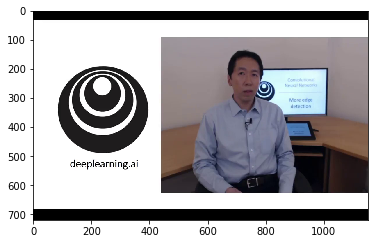

In [24]:
a = '/shared/fusor/home/voleti.vikram/ANDREW_NG/frames/CV_03.C4W1L03_More_Edge_Detection/CV_03.C4W1L03_More_Edge_Detection_frame_00330.png'
img = imageio.imread(a)
plt.imshow(img)

In [23]:
faces = dlib_face_detector(img, 1)

NameError: name 'dlib_face_detector' is not defined

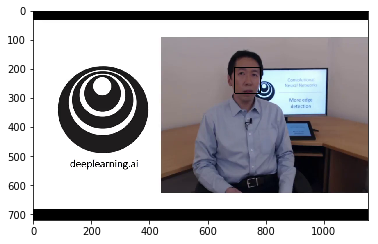

In [29]:
import numpy as np
face_rect = [693, 196, 782, 285]
b = np.array(img)
b[face_rect[1]-2:face_rect[1]+2, face_rect[0]:face_rect[2]] = 0
b[face_rect[3]-2:face_rect[3]+2, face_rect[0]:face_rect[2]] = 0
b[face_rect[1]:face_rect[3], face_rect[0]-2:face_rect[0]+2] = 0
b[face_rect[1]:face_rect[3], face_rect[2]-2:face_rect[2]+2] = 0
plt.imshow(b)

In [33]:
face_rect_exp = utils.expand_rect(face_rect, scale=1.6, frame_shape=img.shape)

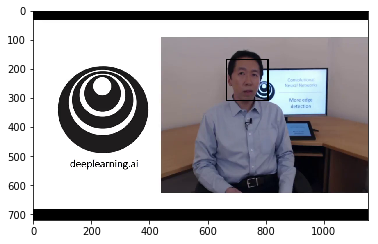

In [34]:
c = np.array(img)
c[face_rect_exp[1]-2:face_rect_exp[1]+2, face_rect_exp[0]:face_rect_exp[2]] = 0
c[face_rect_exp[3]-2:face_rect_exp[3]+2, face_rect_exp[0]:face_rect_exp[2]] = 0
c[face_rect_exp[1]:face_rect_exp[3], face_rect_exp[0]-2:face_rect_exp[0]+2] = 0
c[face_rect_exp[1]:face_rect_exp[3], face_rect_exp[2]-2:face_rect_exp[2]+2] = 0
plt.imshow(c)

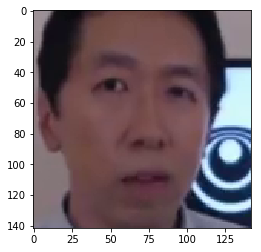

In [35]:
d = img[face_rect_exp[1]:face_rect_exp[3], face_rect_exp[0]:face_rect_exp[2]]
plt.imshow(d)

In [36]:
lms = np.array([[685, 220], [686, 233], [689, 244], [692, 254], [697, 264], [705, 271], [715, 275], [725, 278], [735, 280], [745, 279], [754, 276], [763, 272], [769, 266], [773, 257], [776, 248], [778, 238], [781, 227], [699, 209], [706, 203], [715, 201], [725, 202], [734, 206], [748, 208], [757, 206], [765, 206], [772, 210], [777, 217], [741, 219], [741, 225], [741, 232], [741, 239], [731, 245], [735, 246], [740, 247], [744, 246], [748, 246], [708, 219], [714, 216], [721, 216], [726, 221], [720, 221], [714, 221], [752, 223], [757, 220], [763, 221], [768, 224], [763, 225], [757, 225], [722, 258], [730, 254], [737, 252], [740, 253], [744, 253], [748, 255], [753, 259], [748, 262], [743, 263], [739, 263], [735, 263], [729, 261], [726, 258], [736, 256], [740, 257], [743, 257], [750, 259], [743, 258], [740, 258], [736, 258]])

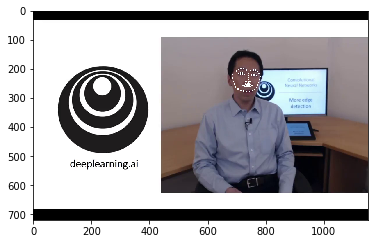

In [38]:
utils.plot_2D_landmarks(img, lms)